In [34]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [98]:
grossdf = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
namesdf = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
# not neccessary at the current time 
akasdf = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
titlesdf = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
crewdf = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
principalsdf = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
#ratingsdf = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
movieinfodf = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep='\t')
tmdbdf = pd.read_csv('data/zippedData/tmdb.movies.csv.gz', index_col=0)
budgetdf = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
reviewsdf = pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding = 'unicode_escape')
#I don't really know what this encoding parameter is doing but I got it to open the data!


In [102]:
reviewsdf.head()

NameError: name 'reviewsdf' is not defined

In [4]:
reviewsdf.info()

In [5]:
grossdf.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
grossdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
namesdf.head()


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [8]:
namesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [99]:
akasdf.head()


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [100]:
akasdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [11]:
titlesdf.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
titlesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
crewdf.head()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [14]:
crewdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [15]:
principalsdf.head()


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [16]:
principalsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [20]:
#ratingsdf.head()


NameError: name 'ratingsdf' is not defined

In [ ]:
#ratingsdf.info()

In [ ]:
#movieinfodf.head()


In [ ]:
#movieinfodf.info()

In [95]:
tmdbdf.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [96]:
tmdbdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [57]:
budgetdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_net_gross
0,1,2009-12-18,Avatar,425000000,760507625,-2147483648,1722483648
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [58]:
budgetdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4198 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 4198 non-null   int64         
 1   release_date       4198 non-null   datetime64[ns]
 2   movie              4198 non-null   object        
 3   production_budget  4198 non-null   int32         
 4   domestic_gross     4198 non-null   int32         
 5   worldwide_gross    4198 non-null   int32         
 6   total_net_gross    4198 non-null   int32         
dtypes: datetime64[ns](1), int32(4), int64(1), object(1)
memory usage: 196.8+ KB


In [62]:
budgetdf.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
total_net_gross      0
dtype: int64

I've located the top net grossing films and now want to figure out why they are so successful

In [59]:
#highest grossing movies
#removed the commas and dollar signs from the data so that it could be converted
#reassigned the data to a float type instead of object so that it may be sorted properly 
#(as obj the grosses starting closest to 999 were listed first)
# created a copy of the budget dataframe sorted by the highest worldwide gross
budgetdf.replace(',','', regex=True, inplace=True)
budgetdf.replace('\$','', regex=True, inplace=True)
budgetdf['production_budget'] = budgetdf['production_budget'].astype(float)
budgetdf['worldwide_gross'] = budgetdf['worldwide_gross'].astype(float)
budgetdf['domestic_gross'] = budgetdf['domestic_gross'].astype(float)
budgetdf['production_budget'] = budgetdf['production_budget'].astype(int)
budgetdf['worldwide_gross'] = budgetdf['worldwide_gross'].astype(int)
budgetdf['domestic_gross'] = budgetdf['domestic_gross'].astype(int)
budgetdf['release_date'] = pd.to_datetime(budgetdf['release_date'])
budgetdf = budgetdf[budgetdf['release_date'].dt.year >= 2001]
budgetdf['total_net_gross'] = budgetdf['worldwide_gross'] - budgetdf['production_budget']
highestgrossdf = budgetdf.sort_values(by='total_net_gross', ascending=False)
highest20df = highestgrossdf.head(20)
highest20df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_net_gross
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
0,1,2009-12-18,Avatar,425000000,760507625,-2147483648,1722483648
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,1292935897
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,1148258224
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799
155,56,2013-11-22,Frozen,150000000,400738009,1272469910,1122469910


Text(0, 0.5, 'Gross')

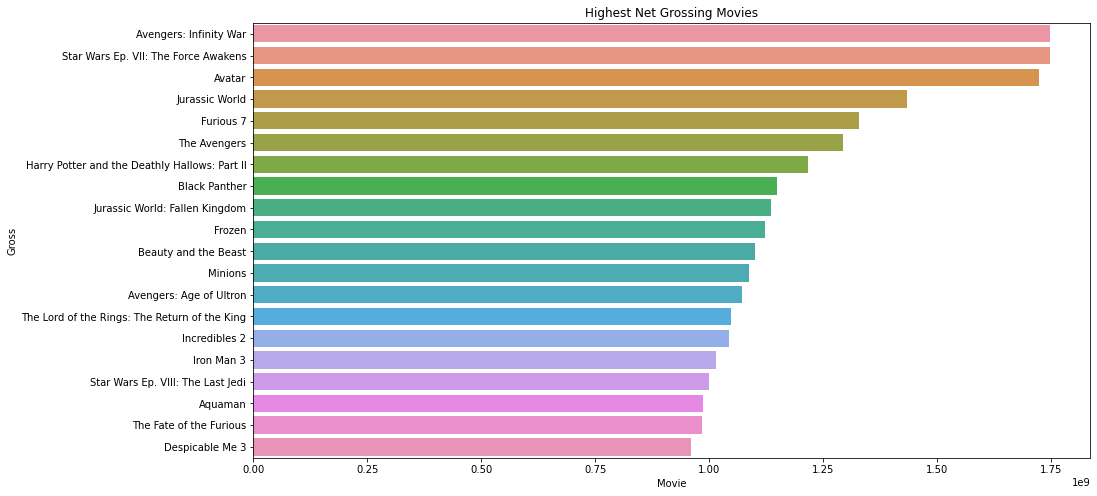

In [56]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = highest20df['movie'], x = highest20df['total_net_gross'])
ax.set_title('Highest Net Grossing Movies')
ax.set_xlabel('Movie')
ax.set_ylabel('Gross')

In [39]:
namesdf

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


In [40]:
#grabbing the columns that I need
namesdf = namesdf[['nconst','primary_name']]

In [54]:
titlesdf.isnull().sum()

tconst           0
primary_title    0
dtype: int64

In [41]:
namesdf

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


In [17]:
titlesdf.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [42]:
titlesdf = titlesdf[['tconst','primary_title']]

In [52]:
titlesdf.isnull().sum()

tconst           0
primary_title    0
dtype: int64

In [53]:
titlesdf

,tconst,primary_title
0,tt0063540,Sunghursh
1,tt0066787,One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera
...,...,...
146139,tt9916538,Kuambil Lagi Hatiku
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro
146141,tt9916706,Dankyavar Danka
146142,tt9916730,6 Gunn


In [63]:
principalsdf.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [64]:
principalsdf = principalsdf[['tconst','nconst','category']]

In [65]:
principalsdf

,tconst,nconst,category
0,tt0111414,nm0246005,actor
1,tt0111414,nm0398271,director
2,tt0111414,nm3739909,producer
3,tt0323808,nm0059247,editor
4,tt0323808,nm3579312,actress
...,...,...,...
1028181,tt9692684,nm0186469,actor
1028182,tt9692684,nm4929530,self
1028183,tt9692684,nm10441594,director
1028184,tt9692684,nm6009913,writer


In [72]:
# Adding the names dataframe to principals
df1 = namesdf.merge(principalsdf, on=['nconst'])

# Adding the titles 
df2 = df1.merge(titlesdf, on=['tconst'])

# Adding the budget datafram
df3 = df2.merge(highestgrossdf, left_on=['primary_title'], right_on=['movie'])

# Dropping duplicate rows to ensure our net profits are not inflated by counting rows multiple times
df3 = df3.drop_duplicates()

In [73]:
df3

,nconst,primary_name,tconst,category,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_net_gross
0,nm0061671,Mary Ellen Bauder,tt2398241,producer,Smurfs: The Lost Village,5,2017-04-07,Smurfs: The Lost Village,60000000,45020282,197578586,137578586
1,nm0038432,Kelly Asbury,tt2398241,director,Smurfs: The Lost Village,5,2017-04-07,Smurfs: The Lost Village,60000000,45020282,197578586,137578586
2,nm0449549,Jordan Kerner,tt2398241,producer,Smurfs: The Lost Village,5,2017-04-07,Smurfs: The Lost Village,60000000,45020282,197578586,137578586
3,nm0962596,Pamela Ribon,tt2398241,writer,Smurfs: The Lost Village,5,2017-04-07,Smurfs: The Lost Village,60000000,45020282,197578586,137578586
4,nm0678963,Peyo,tt2398241,writer,Smurfs: The Lost Village,5,2017-04-07,Smurfs: The Lost Village,60000000,45020282,197578586,137578586
...,...,...,...,...,...,...,...,...,...,...,...,...
27855,nm9940260,Micah Jaeger,tt8633834,actor,The Bucket List,62,2007-12-25,The Bucket List,45000000,93466502,174807445,129807445
27856,nm8869197,Parker Jones,tt8633834,actor,The Bucket List,62,2007-12-25,The Bucket List,45000000,93466502,174807445,129807445
27857,nm9903594,Chad Platt,tt8633834,actor,The Bucket List,62,2007-12-25,The Bucket List,45000000,93466502,174807445,129807445
27858,nm8869199,Michael Nielson,tt8633834,actor,The Bucket List,62,2007-12-25,The Bucket List,45000000,93466502,174807445,129807445


In [74]:
sorteddf = df3.sort_values(by='total_net_gross', ascending=False)

In [75]:
sorteddf

,nconst,primary_name,tconst,category,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_net_gross
6591,nm0751648,Joe Russo,tt4154756,director,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6597,nm0498278,Stan Lee,tt4154756,writer,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6600,nm1321656,Stephen McFeely,tt4154756,writer,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6599,nm1321655,Christopher Markus,tt4154756,writer,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6595,nm0751577,Anthony Russo,tt4154756,director,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200
...,...,...,...,...,...,...,...,...,...,...,...,...
23352,nm0126208,John Byrne,tt6565702,writer,Dark Phoenix,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
23353,nm1055413,Michael Fassbender,tt6565702,actor,Dark Phoenix,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
23354,nm2225369,Jennifer Lawrence,tt6565702,actress,Dark Phoenix,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
23355,nm1334526,Simon Kinberg,tt6565702,director,Dark Phoenix,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650


In [136]:
directors = sorteddf.loc[sorteddf['category'] == 'director']
guyloc = directors.loc[directors['primary_name'] == 'Atsushi Wada']

In [137]:
guyloc

,nconst,primary_name,tconst,category,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_net_gross
27392,nm3786927,Atsushi Wada,tt1775309,director,Avatar,1,2009-12-18,Avatar,425000000,760507625,-2147483648,1722483648


In [92]:
actors = sorteddf.loc[sorteddf['category'] == 'actor']

In [93]:
actresses = sorteddf.loc[sorteddf['category'] == 'actress']

In [138]:
dirgb = directors.groupby(['primary_name']).sum().sort_values(['total_net_gross'], ascending=False)

In [139]:
directors

,nconst,primary_name,tconst,category,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_net_gross
6591,nm0751648,Joe Russo,tt4154756,director,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6595,nm0751577,Anthony Russo,tt4154756,director,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200
27392,nm3786927,Atsushi Wada,tt1775309,director,Avatar,1,2009-12-18,Avatar,425000000,760507625,-2147483648,1722483648
3745,nm1119880,Colin Trevorrow,tt0369610,director,Jurassic World,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864
6236,nm1490123,James Wan,tt2820852,director,Furious 7,67,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794
...,...,...,...,...,...,...,...,...,...,...,...,...
25596,nm0761498,Chris Sanders,tt7504726,director,Call of the Wild,36,2020-02-21,Call of the Wild,82000000,0,0,-82000000
22168,nm0043742,David Ayer,tt5519340,director,Bright,80,2017-12-13,Bright,90000000,0,0,-90000000
12261,nm0336620,F. Gary Gray,tt2283336,director,Men in Black: International,42,2019-06-14,Men in Black: International,110000000,3100000,3100000,-106900000
5638,nm0920425,Simon Wells,tt1305591,director,Mars Needs Moms,94,2011-03-11,Mars Needs Moms,150000000,21392758,39549758,-110450242


In [140]:
top10directors = dirgb.head(10)

In [141]:
top10directors

,id,production_budget,domestic_gross,worldwide_gross,total_net_gross
primary_name,,,,,
Anthony Russo,40,720000000.0,1.346647e+09,3.902606e+09,3.182606e+09
Joe Russo,40,720000000.0,1.346647e+09,3.902606e+09,3.182606e+09
James Wan,259,371500000.0,8.794781e+08,3.083488e+09,2.711988e+09
Joss Whedon,31,555600000.0,1.082285e+09,2.920950e+09,2.365350e+09
Christopher Nolan,150,750000000.0,1.118801e+09,3.086180e+09,2.336180e+09
Pierre Coffin,102,220000000.0,8.842037e+08,2.553409e+09,2.333409e+09
Michael Bay,167,648000000.0,7.778736e+08,2.911998e+09,2.263998e+09
Chris Renaud,179,300000000.0,1.051759e+09,2.518783e+09,2.218783e+09
Peter Jackson,62,750000000.0,8.164902e+08,2.922948e+09,2.172948e+09
